https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9015663/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7849042/

dataset - https://edmond.mpg.de/dataset.xhtml?persistentId=doi:10.17617/3.AJBV1S

project - https://github.com/ChristophReich1996/Yeast-in-Microstructures-Dataset/tree/main

Main dataset - https://tudatalib.ulb.tu-darmstadt.de/handle/tudatalib/2880

https://www.allencell.org/data-downloading.html#DownloadImageData

VVV IMP https://git.rwth-aachen.de/bcs/projects/tp/multi-stylegan

https://ar5iv.labs.arxiv.org/html/2106.08285

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2
from google.colab.patches import cv2_imshow

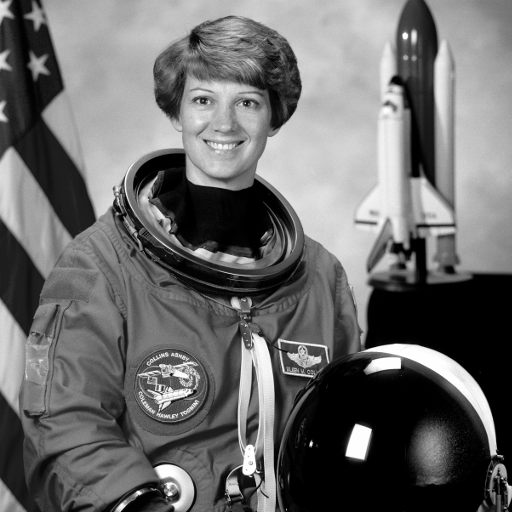

In [ ]:
img = data.astronaut()AC
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img1)

In [ ]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T


In [ ]:
cntr = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)

(0.0, 512.0, 512.0, 0.0)

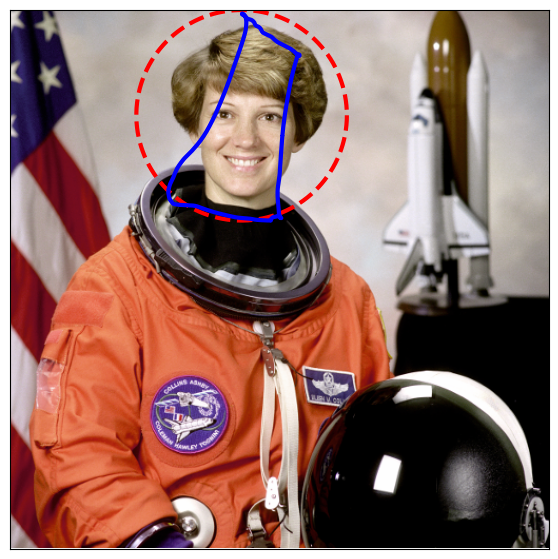

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)

# Circular boundary
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)

# Detected contour
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

Morphological Segmentation

In [ ]:
from skimage.morphology import disk
from skimage.filters import rank

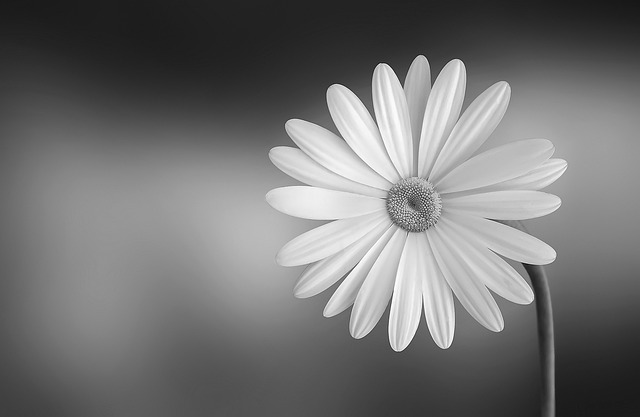

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/marguerite-729510_640.jpg')
img1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1)

In [ ]:
disk_5 = disk(5)
gradient_img = rank.gradient(img1, disk_5)

In [ ]:
markers = np.zeros_like(img1)
markers[img1 < 30] = 1
markers[img1 > 150] = 2

In [ ]:
segmented_img = rank.gradient(img1, disk_5)
segmented_img = (segmented_img - segmented_img.min()) / (segmented_img.max() - segmented_img.min()) * 255


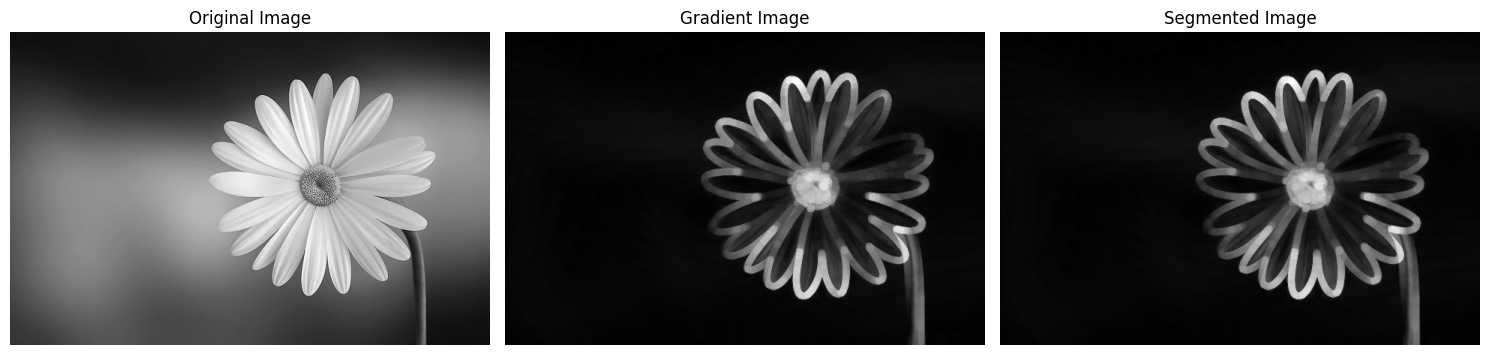

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img1, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(gradient_img, cmap=plt.cm.gray)
ax[1].set_title('Gradient Image')

ax[2].imshow(segmented_img, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()
plt.show()